In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#2A --> B + C
FAo     =      1
FBo     =      0
FCo     =      0
Qo      =    1.5
To      =    350
V       =      5
delH298 = -18000
CpA     =     30
CpB     =     22
CpC     =     38

delCp   = CpB + CpC - 2* CpA
print(f'Delta Cp reaction = {delCp} J/(mol.K)')

Delta Cp reaction = 0 J/(mol.K)


**Energy Balance:**

$F_{i,0}C_{p,i}(T - T_{0}) + \dot{\epsilon}\Delta{H}_{RX} = 0$  

Where $\dot{\epsilon} = \dfrac{\Delta{F}_{i}}{\nu_{i}}$

In [3]:
X = np.linspace(0.001, 0.99) # the rate will go to zero at XA = 1 and
#it will give me issues later, so I choose to avoid the 0 and 1 limits
FA           =                    FAo*(1 - X)
delFA        =                       FA - FAo
nu_A         =                             -2
eps          =                     delFA/nu_A
sum_Fi_Cpi_o =              FAo*CpA + FBo*CpB

T_eb         = -eps*delH298/sum_Fi_Cpi_o + To

**Mole Balance**

$F_{A,0} - F_{A} + r_{A}V = 0$

$r_{A} = k_{0}exp^{(\dfrac{-E}{RT})}C^{2}_{A}$

In [6]:
ko   = 1e8
E    = 66000 #70000 or 66000
#elementary rate
#I already have FA = FAo*(1 - X)
CA   = FA/Qo #liquid phase reaction
#Q does not change
rA   = (FAo - FA)/-V
k    = -rA/CA**2
R    = 8.314
T_mb = (np.log(k/ko)*R/-E)**-1

**Graphical Solution**

(0, 1)

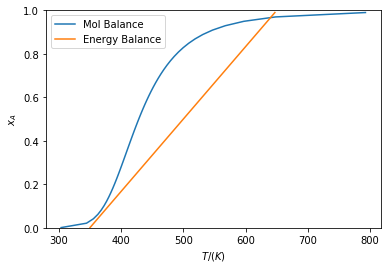

In [7]:
plt.plot(T_mb, X, label = 'Mol Balance')
plt.plot(T_eb, X, label = 'Energy Balance')
plt.legend()
plt.xlabel('$T/(K)$')
plt.ylabel('$x_{A}$')
plt.ylim(0,1)

 ## <span style="color:blue"> Use fsolve(first guess values for X and T now pretty good!)</span> ##

<span style="color:blue"> def solver(var):</span>&nbsp; 
<blockquote>
    <p><span style="color:blue">X, T = var </p>
    <p><span style="color:blue">FA   = ... </p>  
    <p><span style="color:blue">eps  = ... </p>  
    <p><span style="color:blue">CA   = ... </p>  
    <p><span style="color:blue">rA   = ... </p>  
    <p><span style="color:blue">MB   = FAo - FA + rAV </p> 
    <p><span style="color:blue">delHrx - delH298 + delCprx(T - 298) </p>  
    <p><span style="color:blue">EB = FAo*CpA*(T - To) + eps*delHrx </p>  
    <p><span style="color:blue">return MB, EB </p> 
</blockquote>    </span> 
<span style="color:blue">Etc......</span>
   